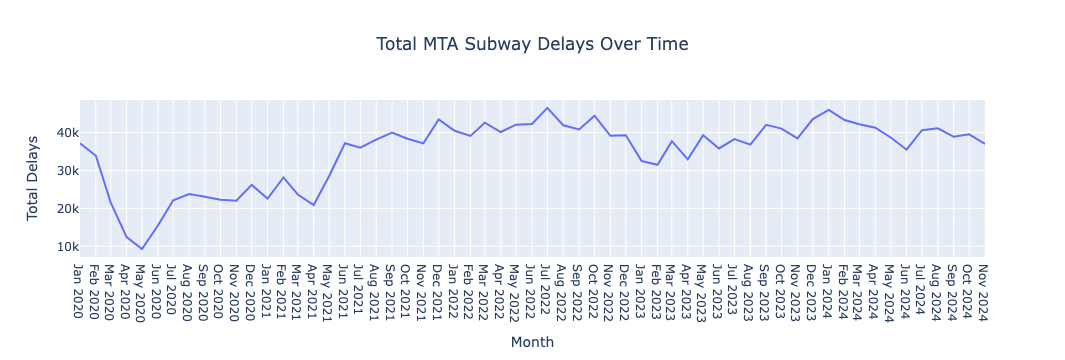

In [28]:
import pandas as pd
import plotly.express as px

file_path = 'mta-datasets/MTA_Subway_Trains_Delayed__Beginning_2020_20241218.csv'  # Update with the actual path
data = pd.read_csv(file_path)

# Convert the 'month' column to datetime
data['month'] = pd.to_datetime(data['month'], format='%Y-%m-%d')

# Group the data by month and sum the delays
monthly_delays = data.groupby('month')['delays'].sum().reset_index()

# Create an interactive line chart using Plotly
fig = px.line(monthly_delays, x='month', y='delays', title='Total MTA Subway Delays Over Time',
              labels={'month': 'Month', 'delays': 'Total Delays'},
              line_shape='linear')

# Customize layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Total Delays',
    template='plotly',
    xaxis=dict(tickmode='array', tickvals=monthly_delays['month'], ticktext=monthly_delays['month'].dt.strftime('%b %Y')),
    title_x=0.5,
)

# Show the plot
fig.show()


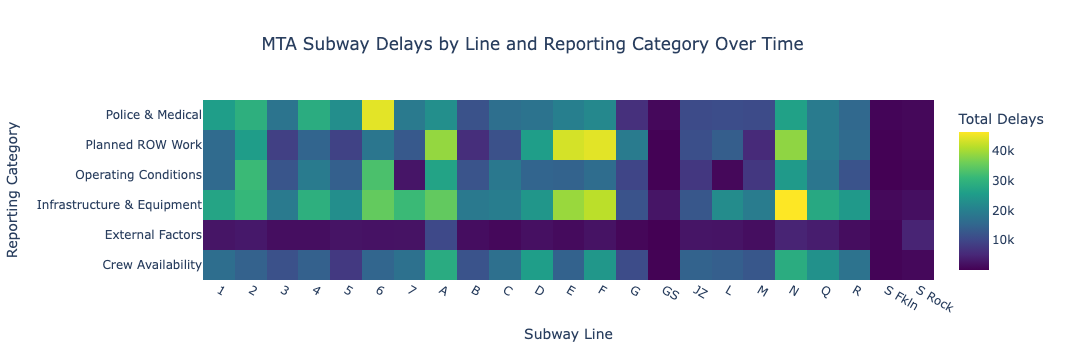

In [31]:
# Group the data by 'month', 'line', and 'reporting_category' and sum the delays
heatmap_data = data.groupby(['month', 'line', 'reporting_category'])['delays'].sum().reset_index()

# Create the heatmap
fig = px.density_heatmap(heatmap_data,
                         x="line",
                         y="reporting_category",
                         z="delays",
                         color_continuous_scale='Viridis',
                         title="MTA Subway Delays by Line and Reporting Category Over Time",
                         labels={'delays': 'Total Delays', 'line': 'Subway Line', 'reporting_category': 'Reporting Category'})

# Customize the layout for better readability
fig.update_layout(
    xaxis_title="Subway Line",
    yaxis_title="Reporting Category",
    title_x=0.5,
    template='plotly',
    coloraxis_colorbar=dict(title="Total Delays"),
)

# Show the plot
fig.show()


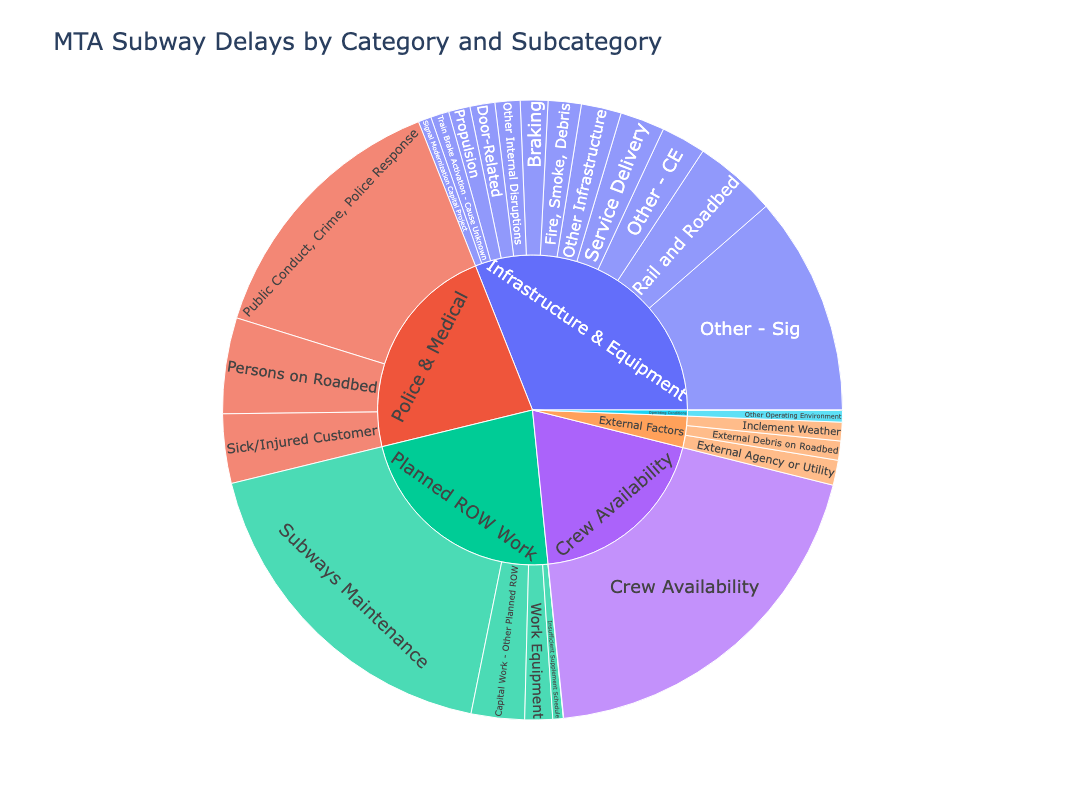

In [38]:

fig = px.sunburst(
    aggregated_data,
    path=["reporting_category", "subcategory"],
    values="delays",
    title="MTA Subway Delays by Category and Subcategory",
)
fig.update_layout(
    height = 800,
    width = 800,
    title={'font': {'size': 24}},  # Increase title font size
    font={'size': 18},  # Increase general font size for labels
)
fig.show()


In [30]:
print(monthly_delays.columns)


Index(['month', 'delays'], dtype='object')
